# Batch processing

## Step 1: Detect Onset-Offset events in behavioral files

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# Directory where CSV files are located
directory_path = 'H:/Magdalena/photometry/video_analysis_frames'

# List of behavior columns in your dataset
behavior_columns = ['background', 'approach', 'nose-nose', 'nose-tail', 'general', 'fight']

# Function to process each CSV file
def process_csv_file(data_path):
    data = pd.read_csv(data_path)
    behavior_events = []

    for col in behavior_columns:
        # Check if the column exists in the DataFrame
        if col not in data.columns:
            print(f"Warning: Column '{col}' not found in {data_path}. Skipping this column.")
            continue

        onset_indices = data.index[data[col].diff() == 1].tolist()
        offset_indices = data.index[data[col].diff() == -1].tolist()

        if data[col].iloc[0] == 1:
            onset_indices = [0] + onset_indices
        if data[col].iloc[-1] == 1:
            offset_indices = offset_indices + [data.index[-1]]

        for start, end in zip(onset_indices, offset_indices):
            behavior_events.append({
                'Behavior': col,
                'Onset': start,
                'Offset': end
            })

    if behavior_events:  # Check if there are any events to save
        behavior_events_df = pd.DataFrame(behavior_events)
        base_name = os.path.splitext(data_path)[0]
        output_path = f'{base_name}_events.csv'
        behavior_events_df.to_csv(output_path, index=False)
        print(f'Behavior events saved to {output_path}')
    else:
        print(f"No behavior events found in {data_path}. No file created.")

    behavior_events_df = pd.DataFrame(behavior_events)
    base_name = os.path.splitext(data_path)[0]
    output_path = f'{base_name}_events.csv'
    behavior_events_df.to_csv(output_path, index=False)

# Search for all CSV files in the directory and its subdirectories
csv_files = glob.glob(f'{directory_path}/**/*.csv', recursive=True)

# Process each CSV file found
# Process each CSV file found, ignoring files that end with '_events.csv'
for file_path in csv_files:
    if not file_path.endswith('_events.csv'):
        process_csv_file(file_path)


Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M1-r-2023-12-01-085245_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M2-r-2023-12-01-091318_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M3-r-2023-12-01-112503_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M1-r-2023-12-01-100015_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M2-r-2023-12-01-102246_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M3-r-2023-12-01-104459_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M4-r-2023-12-01-110519_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\eCB\sham\C180dupM1-r-2024-01-24-140127_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_

In [19]:
# Delete all files ending with '_events.csv' in the directory and its subdirectories

import os
import glob

# Directory where CSV files are located
directory_path = 'H:/Magdalena/photometry/video_analysis_frames'

# Search for all files ending with '_events.csv' in the directory and its subdirectories
events_files = glob.glob(f'{directory_path}/**/*_events.csv', recursive=True)

# Delete each file found
for file_path in events_files:
    try:
        os.remove(file_path)
        print(f'Deleted {file_path}')
    except Exception as e:
        print(f'Error deleting {file_path}: {e}')


Deleted H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M1-r-2023-12-01-085245_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M2-r-2023-12-01-091318_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M3-r-2023-12-01-112503_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M1-r-2023-12-01-100015_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M2-r-2023-12-01-102246_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M3-r-2023-12-01-104459_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M4-r-2023-12-01-110519_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\eCB\sham\C180dupM1-r-2024-01-24-140127_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\eCB\sham\C180dupM2-r-2024-01-24-142142_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\eCB\sham\C205dupM1-r-2024-01-23-135232_eve

In [1]:
# Define the PPD file path
import os
import h5py
import tkinter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from data_import import import_ppd
from scipy.signal import savgol_filter
from scipy.stats import sem


ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\C204M1-r-2024-01-23-111554.ppd'
data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)




FileNotFoundError: [Errno 2] No such file or directory: 'H:\\Magdalena\\photometry\\fp_recordings\\C204M1-r-2024-01-23-111554.ppd'

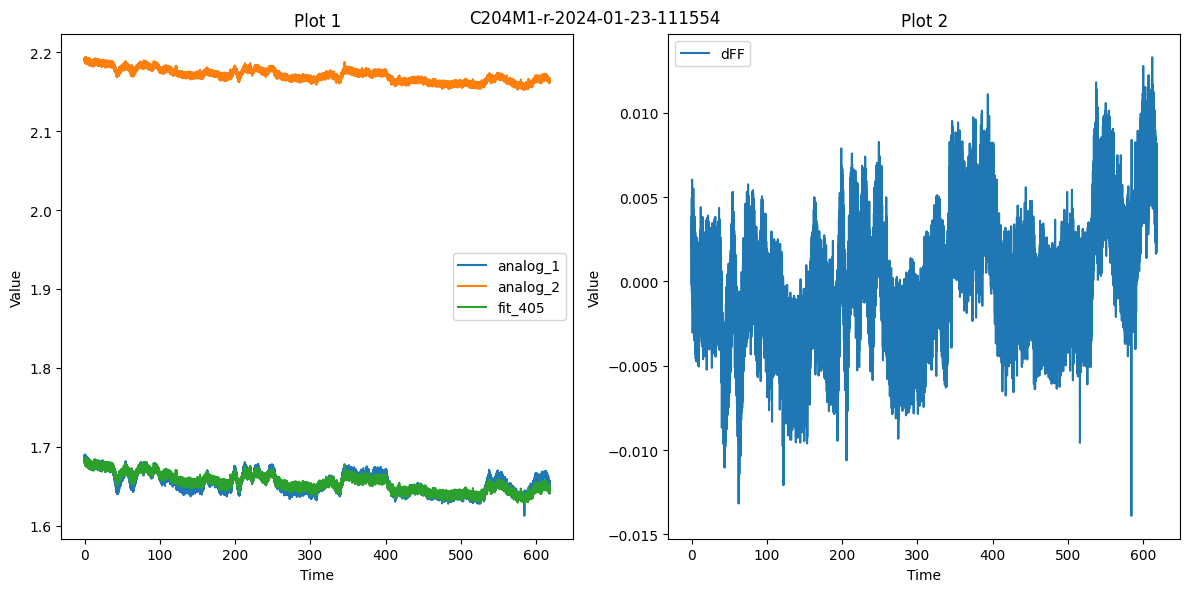

index: (array([688, 788], dtype=int64),)


In [ ]:

# Extract the filename without the extension
filename = os.path.splitext(os.path.basename(ppd_file_path))[0]

# Load the data from the CSV file
data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)

sampling_rate = data['sampling_rate']

# Convert sample index to time vector
time = np.arange(len(data['analog_1'])) / sampling_rate

# http://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline
reg= np.polyfit(data['analog_2'], data['analog_1'], 1) # ch1 is 465nm, ch2 is 405nm 
fit_405=reg[0]*data['analog_2']+reg[1]
dFF=(data['analog_1']-fit_405)/fit_405 #this gives deltaF/F
data['fit_405']=fit_405
data['dFF']=dFF

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
ax1.plot(time, data['analog_1'], label='analog_1')
ax1.plot(time, data['analog_2'], label='analog_2')
ax1.plot(time, data['fit_405'], label='fit_405')

# Set plot 1 properties
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.set_title('Plot 1')
ax1.legend()

# Plot 2
ax2.plot(time, data['dFF'], label='dFF')

# Set plot 2 properties
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.set_title('Plot 2')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure title
fig.suptitle(filename)

# Save the figure as PNG with 300 dpi
save_path = os.path.join(os.path.dirname(ppd_file_path), filename + '.png')
fig.savefig(save_path, dpi=300)

# Display the plots
plt.show()


# Index of np.diff(data['digital_1']) bigger than 0.5 or smaller than -0.5
index = np.where((np.diff(data['digital_1']) > 0.5) | (np.diff(data['digital_1']) < -0.5))

# Print the onsets and offsets
print("index:", index)

dFF = dFF[index[0][0]:]

## 
fps = 30


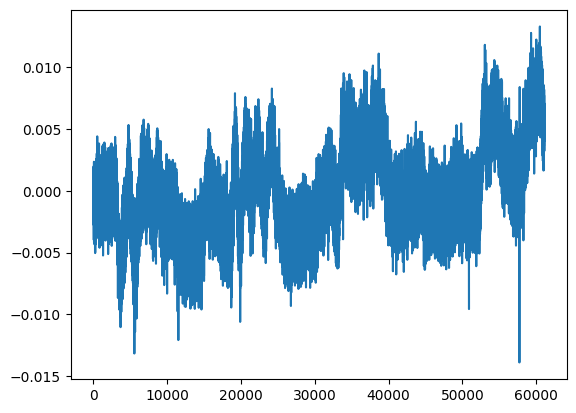

In [ ]:
plt.plot(dFF)

In [2]:
import pandas as pd
import numpy as np

# Load the behavior events CSV file
events_path = r'C:\Users\huang\codes\nevian_lab\Magdalena_fp\C204M1 social_labels_events.csv'  # Update this with the path to your events file
events_data = pd.read_csv(events_path)

# Value to be subtracted from all onset and offset values
fps = 52
led_on = 655

# Subtract 'led_on' from all onset and offset values
events_data['Onset'] = (events_data['Onset'] - led_on) / fps * sampling_rate
events_data['Offset'] = (events_data['Offset'] - led_on) / fps * sampling_rate

# Unique behaviors in the dataset
unique_behaviors = events_data['Behavior'].unique()

# Initialize a dictionary to store arrays for each behavior
behavior_arrays = {}

# Iterate over each unique behavior to create arrays
for behavior in unique_behaviors:
    # Filter the DataFrame for the current behavior
    filtered_events = events_data[events_data['Behavior'] == behavior]
    
    # Create a NumPy array with onset and offset values
    behavior_array = np.column_stack((filtered_events['Onset'].values, filtered_events['Offset'].values))
    
    # Store the array in the dictionary
    behavior_arrays[behavior] = behavior_array

# Example: Accessing the array for the 'background' behavior
background_array = behavior_arrays['background']

print("Array for 'background' behavior:", background_array)


NameError: name 'sampling_rate' is not defined

In [30]:
behavior_arrays['background'][:,0]

array([-1259.61538462,  1313.46153846,  2121.15384615,  2307.69230769,
        2705.76923077,  3596.15384615,  4932.69230769,  5146.15384615,
        7317.30769231,  7538.46153846,  8582.69230769,  9913.46153846,
       10186.53846154, 11980.76923077, 33948.07692308, 38753.84615385,
       41673.07692308, 44780.76923077, 46140.38461538, 47986.53846154,
       55848.07692308, 60934.61538462])

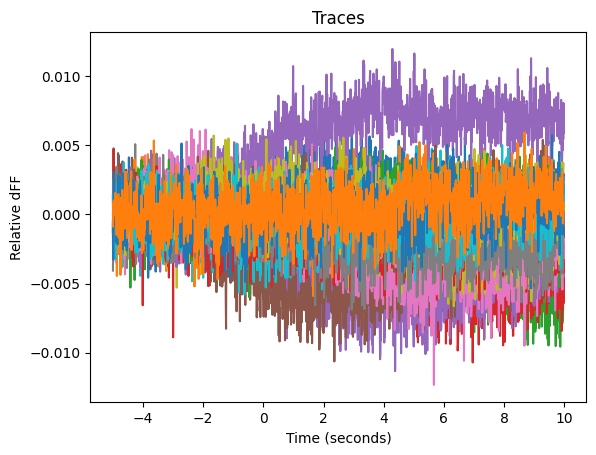

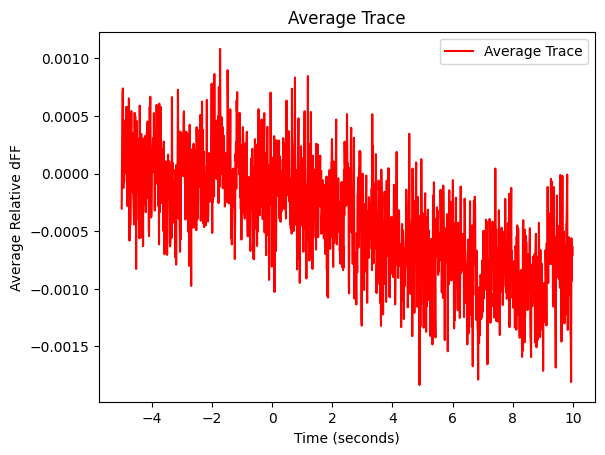

In [48]:
trace_duration = 15  # 5 seconds before and 10 seconds after each data index


# Convert trace duration from seconds to data points
trace_duration_points = trace_duration * sampling_rate

# Create an empty matrix to store trace data
trace_data_matrix = []

pre_start = 5
post_start = 10

# Ensure each trace has the same number of points
num_points_per_trace = pre_start * sampling_rate + post_start * sampling_rate

# Initialize list to store fixed-length trace data
trace_data_matrix = []

fig, ax = plt.subplots()

for index in behavior_arrays['general'][:, 0]:
    start = int(index - pre_start * sampling_rate)
    end = int(start + num_points_per_trace)  # Ensure fixed length
    if start < 0 or end > len(dFF):  # Skip if trace goes out of bounds
        continue
    trace_data = dFF[start:end]
    time = np.arange(-pre_start, post_start, 1 / sampling_rate)

    baseline_start = int(index - 5 * sampling_rate)
    baseline_end = int(index - 3 * sampling_rate)
    baseline = np.mean(dFF[baseline_start:baseline_end])

    relative_trace_data = trace_data - baseline

    ax.plot(time, relative_trace_data)
    trace_data_matrix.append(relative_trace_data)

ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Relative dFF')
ax.set_title('Traces')
plt.show()

# Now, calculating the average trace should work without error
trace_data_matrix = np.array(trace_data_matrix)  # Convert list to NumPy array for mean calculation
average_trace = np.mean(trace_data_matrix, axis=0)

plt.plot(time, average_trace, label='Average Trace', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Average Relative dFF')
plt.title('Average Trace')
plt.legend()
plt.show()
